# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
# importação das bibliotecas que serão usadas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
# importação da base

df = pd.read_csv('base_scikitlearn.csv', index_col=None)
df.head(2)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [3]:
# avaliação da base criada na tarefa 01

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  float64
 2   tempo_emprego                           16650 non-null  float64
 3   possui_celular                          16650 non-null  int64  
 4   possui_fone_comercial                   16650 non-null  int64  
 5   possui_fone                             16650 non-null  int64  
 6   possui_email                            16650 non-null  int64  
 7   qt_pessoas_residencia                   16650 non-null  float64
 8   mau                                     16650 non-null  int64  
 9   sexo_M                                  16650 non-null  int64  
 10  posse_de_veiculo_Y                      16650 non-null  in

In [4]:
# separando o dataframe em variável alvo e variáveis explicativas

y = df['mau']
X = df.drop('mau', axis=1)

print(y.head())
X

0    0
1    0
2    0
3    0
4    0
Name: mau, dtype: int64


,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,1,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,0,0,...,1,1,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0


In [5]:
# criando os splits para treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [6]:
# 1)

clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [7]:
# 2)

clf = clf.fit(X_train,y_train)
clf

DecisionTreeClassifier(random_state=100)

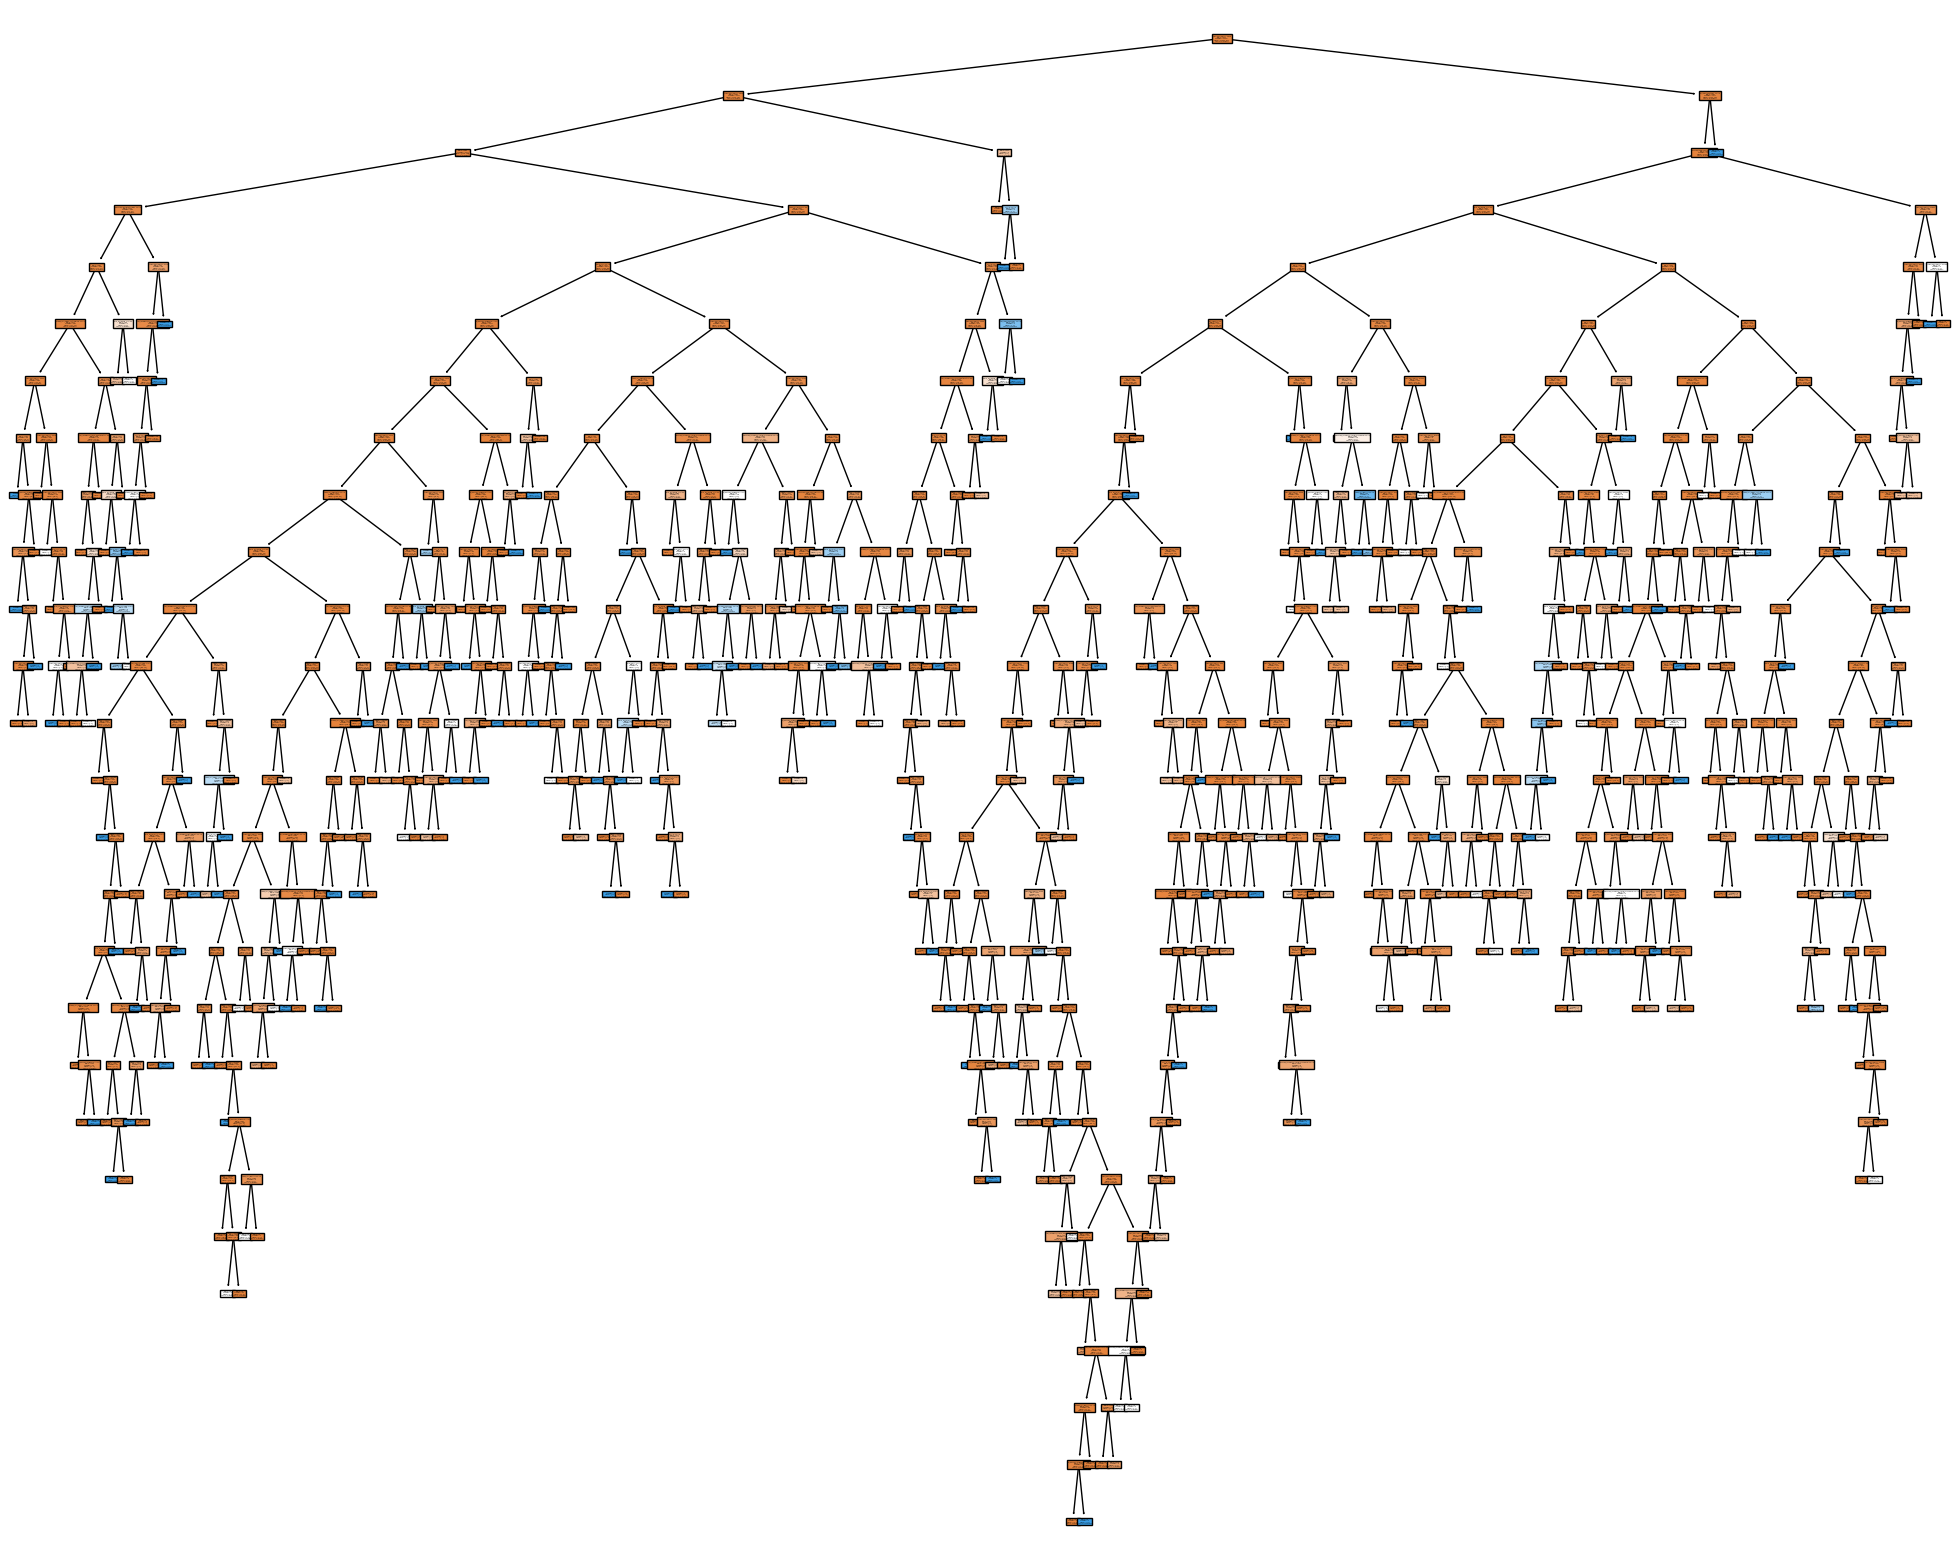

In [8]:
# 3)

plt.figure(figsize=(25, 20))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X.columns);

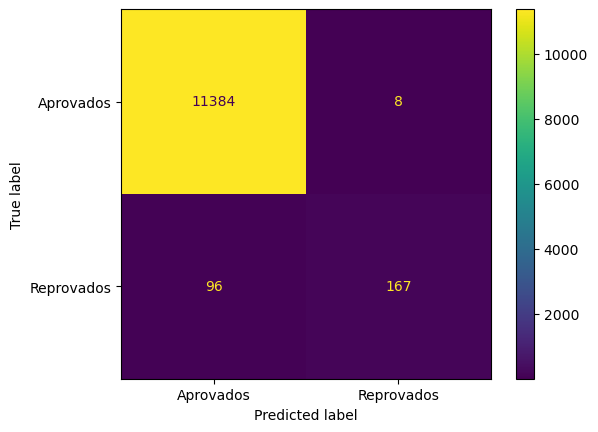

In [9]:
# 4)

cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot();

In [10]:
# 5)

predict = clf.predict(X_train)
acc_train = accuracy_score(y_train, predict)
acc_train

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [11]:
# 1)

predict_test = clf.predict(X_test)

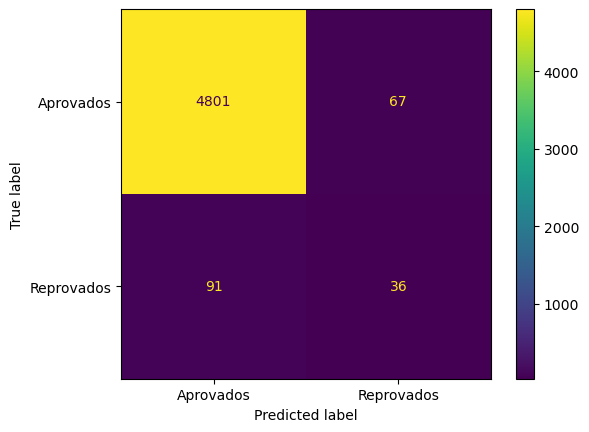

In [12]:
# 2)

cm_test = confusion_matrix(y_test, predict_test, labels=clf.classes_)
MatrizDeConfusao_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao_test.plot();

In [13]:
# 3)

acc_test = accuracy_score(y_test, predict_test)
acc_test

0.9683683683683684

In [14]:
print(f'Acurácia do classificador nos dados de treino: {acc_train*100}\n')
print(f'Acurácia do classificador nos dados de teste: {acc_test*100}')

Acurácia do classificador nos dados de treino: 99.1076791076791

Acurácia do classificador nos dados de teste: 96.83683683683684


In [15]:
# 4)

clf_pruned = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_pruned = clf_pruned.fit(X_train, y_train)
predict_pruned = clf_pruned.predict(X_test)
acc_pruned = accuracy_score(y_test, predict_pruned)
acc_pruned

0.9727727727727727

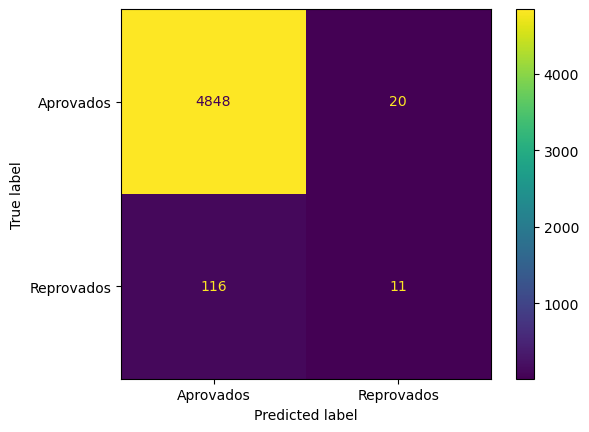

In [16]:
cm_pruned = confusion_matrix(y_test, clf_pruned.predict(X_test), labels=clf_pruned.classes_)
MatrizDeConfusao_pruned = ConfusionMatrixDisplay(confusion_matrix=cm_pruned, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao_pruned.plot();

In [17]:
pct_maus = ((cm_pruned[0,1] + cm_pruned[1, 1]) / len(y_test)) # falso 'mau' + verdadeiro 'mau' dividido pelo total de clientes em y_test
print(f'Acurácia com todos os clientes reprovados: {pct_maus * 100: .2f}%')


Acurácia com todos os clientes reprovados:  0.62%


In [18]:
# 5)

# caso o modelo classificasse todos os clientes em y_test como 'Aprovados', a acurácia seria a seguinte:

verdadeiro_bom = cm_pruned[0].sum()
total_clientes_y_test = len(y_test)
acc_todos_aprovados = verdadeiro_bom / total_clientes_y_test
print(f'Acurácia com todos os clientes aprovados: {acc_todos_aprovados * 100: .2f}%')

Acurácia com todos os clientes aprovados:  97.46%
